In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne

import matplotlib.pyplot as plt
%matplotlib inline

import hickle as hkl

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX 960 (CNMeM is disabled)


In [2]:
def plot_multiple(images):
    ni = images.shape[0]
    plt.figure(figsize=(50,3))
    plt.axis('off')
    for i in range(ni):
        plt.axis('off')
        plt.subplot(1,ni,i+1)
        plt.imshow(images[i].reshape([80,80]),cmap='gray')

In [3]:
def plot(image):
    plt.axis('off')
    plt.imshow(image.reshape([80,80]),cmap='gray')

In [4]:
np.random.seed(8)

In [5]:
# prepare dataset
_X = hkl.load('30Kaffine.hkl')
_Y = hkl.load('30Kaffine_label.hkl')
print _X.shape,_Y.shape
sharedX = theano.shared(np.asarray(_X,dtype=theano.config.floatX)/255.0,borrow=True)

(30000, 6400) (30000,)


In [6]:
sharedY = theano.shared(np.asarray(_Y,dtype=theano.config.floatX),borrow=True)

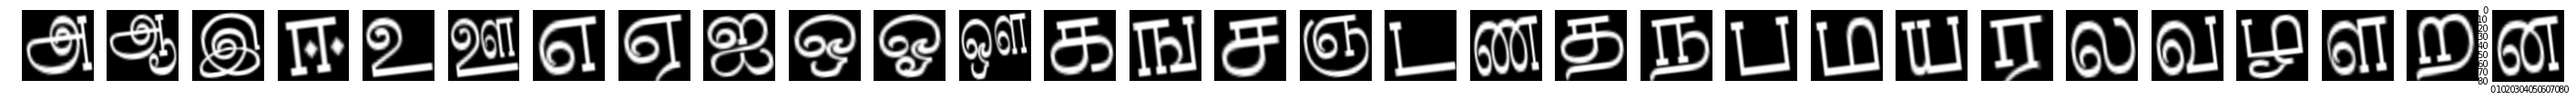

In [7]:
plot_multiple(_X[:30])

In [8]:
def batch_gen(X,y,N):
    while True:
        idx = np.random.choice(len(y),N)
        yield X[idx].astype('float32'),y[idx].astype('int32')

In [9]:
# a simple network
#  input layer
l_in = lasagne.layers.InputLayer((None,80*80))
#  output layer
l_out = lasagne.layers.DenseLayer(l_in, num_units=30,nonlinearity=lasagne.nonlinearities.softmax)

In [10]:
# symbolic variables
X = T.matrix('X')
Y = T.ivector('Y')

In [11]:
# symbolic variable for network output and predicted class
output = lasagne.layers.get_output(l_out,X)
pred = output.argmax(-1)

In [12]:
# loss/cost function
#  take mean over minibatch
loss = T.mean(lasagne.objectives.categorical_crossentropy(output,Y))
# accuracy
acc = T.mean(T.eq(pred,Y))

In [13]:
# parameters
params = lasagne.layers.get_all_params(l_out)


In [14]:
# gradient and updates
grad = T.grad(loss,params)
updates = lasagne.updates.sgd(grad,params,learning_rate=0.05)
print updates

OrderedDict([(W, Elemwise{sub,no_inplace}.0), (b, Elemwise{sub,no_inplace}.0)])


In [15]:
# build training function
train = theano.function([X,Y],[loss,acc],updates=updates)

In [16]:
# predicted class
predict = theano.function([X],pred)

In [17]:
# batch size
batch_size = 64
num_batches = _X.shape[0] // batch_size

In [18]:
train_batches = batch_gen(_X,_Y,64)

11


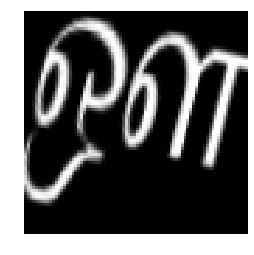

In [19]:
X,y = next(train_batches)
plt.axis('off')
plt.imshow(X[1].reshape([80,80]),cmap='gray',interpolation='nearest')
print y[1]

In [20]:
for epoch in range(1000):
    train_loss = 0
    train_acc = 0
    for _ in range(num_batches):
        X_, y_ = next(train_batches)
        loss, acc = train(X,y)
        train_loss += loss
        train_acc  += acc
    train_loss /= num_batches
    train_acc /= num_batches
        
    print 'Epoch : ',epoch,'Loss : ',train_loss,'Accuracy : ',train_acc 
        

Epoch :  0 Loss :  2800.25904664 Accuracy :  0.989583333333
Epoch :  1 Loss :  0.0 Accuracy :  1.0
Epoch :  2 Loss :  0.0 Accuracy :  1.0
Epoch :  3 Loss :  0.0 Accuracy :  1.0
Epoch :  4 Loss :  0.0 Accuracy :  1.0
Epoch :  5 Loss :  0.0 Accuracy :  1.0
Epoch :  6 Loss :  0.0 Accuracy :  1.0
Epoch :  7 Loss :  0.0 Accuracy :  1.0
Epoch :  8 Loss :  0.0 Accuracy :  1.0
Epoch :  9 Loss :  0.0 Accuracy :  1.0
Epoch :  10 Loss :  0.0 Accuracy :  1.0
Epoch :  11 Loss :  0.0 Accuracy :  1.0
Epoch :  12 Loss :  0.0 Accuracy :  1.0
Epoch :  13 Loss :  0.0 Accuracy :  1.0
Epoch :  14 Loss :  0.0 Accuracy :  1.0
Epoch :  15 Loss :  0.0 Accuracy :  1.0
Epoch :  16 Loss :  0.0 Accuracy :  1.0
Epoch :  17 Loss :  0.0 Accuracy :  1.0
Epoch :  18 Loss :  0.0 Accuracy :  1.0
Epoch :  19 Loss :  0.0 Accuracy :  1.0
Epoch :  20 Loss :  0.0 Accuracy :  1.0
Epoch :  21 Loss :  0.0 Accuracy :  1.0
Epoch :  22 Loss :  0.0 Accuracy :  1.0
Epoch :  23 Loss :  0.0 Accuracy :  1.0
Epoch :  24 Loss :  0.0 Accur

KeyboardInterrupt: 

In [31]:
predict(_X[26].reshape([1,80*80]))

array([10])

In [23]:
weights = l_out.W.get_value().T


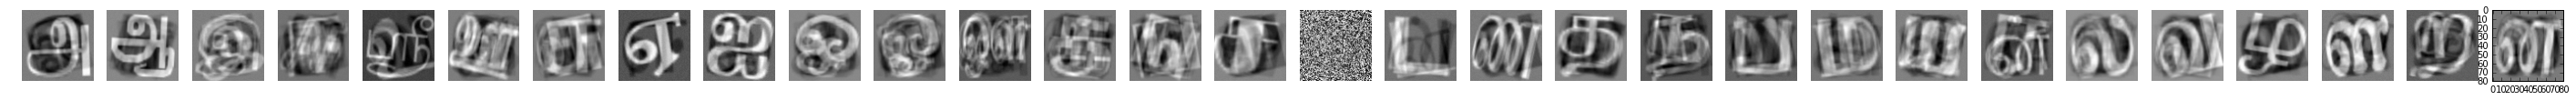

In [22]:
plot_multiple(weights)